# SP Project

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import random
import datetime
random.seed(datetime.datetime.now())

C:\Users\han zhang\AppData\Local\Temp\ipykernel_93780\390467060.py:6: DeprecationWarning: Seeding based on hashing is deprecated
since Python 3.9 and will be removed in a subsequent version. The only 
supported seed types are: None, int, float, str, bytes, and bytearray.
  random.seed(datetime.datetime.now())


i) 电脑生成多条布朗运动(BM)轨道

In [2]:
def BM(T, m, n): 
    # n: sample path的数目
    # m: 时间离散的步数
    # T: 仿真的终止时间
    
    h = T / m # 时间步长
    
    Z = np.random.normal(0.0, 1.0, (n, m)) # 标准正态分布变量
    
    X = np.zeros((n, m + 1)) # 存储n条路径的矩阵
    
    X[:, 0] = x0 # 初始化
    
    for i in range(m):
        # 迭代：矩阵化实现
        X[:, i + 1] = X[:, i] + np.sqrt(h) * Z[:, i]
    
    return X

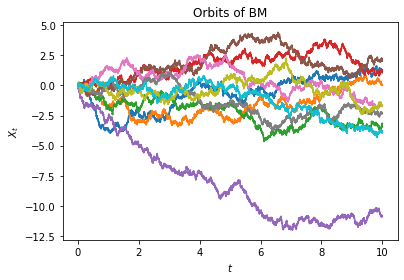

In [3]:
# 实验
x0 = 0
T, m, n = 10.0, 10000, 10

X = BM(T, m, n)

# 时间格点
t_grid = np.linspace(0, T, m + 1)

# 展示结果
for i in range(n):
    plt.plot(t_grid, X[i, :])

plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.title('Orbits of BM')
plt.show()

ii) 设 $B=\left\{\boldsymbol{B}_t ; \boldsymbol{t} \geq \mathbf{0}\right\}$ 为标准布朗运动, $\boldsymbol{X}=\left\{\boldsymbol{X}_{\boldsymbol{t}} ; \boldsymbol{t} \geq \mathbf{0}\right\}$ 为如下随机微分方程的解:
$$
\left\{\begin{array}{l}
d X_t=\alpha\left(v-X_t\right) d t+\sigma d B_t \\
X_0=x_0
\end{array}\right.$$
其中 $\alpha, v, \sigma, x_0$ 为常数。

(1) 用电脑生成 $X$ 的多条轨道;

(2) 探究不同的参数对轨道的影响;

(3) 用Monte Caro方法计算 $\mathrm{E}\left(\boldsymbol{X}_1\right), \boldsymbol{D}\left(\boldsymbol{X}_1\right)$

In [4]:
def SDE_ez(T, m, n): 
    # n: sample path的数目
    # m: 时间离散的步数
    # T: 仿真的终止时间
    
    h = T / m # 时间步长
    
    Z = np.random.normal(0.0, 1.0, (n, m)) # 标准正态分布变量
    
    X = np.zeros((n, m + 1)) # 存储n条路径的矩阵
    
    X[:, 0] = x0 # 初始化
    
    for i in range(m):
        # 迭代：矩阵化实现
        X[:, i + 1] = X[:, i] + alpha * (mu - X[:, i]) * h + sigma * np.sqrt(h) * Z[:, i]
    
    return X

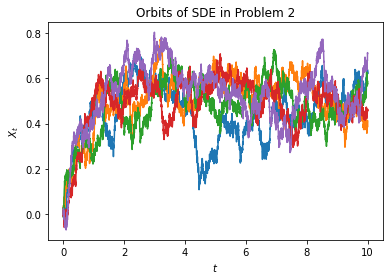

In [5]:
# 实验
x0 = 0
T, m, n = 10.0, 10000, 5
alpha, mu, sigma = 2.0, 0.5, 0.2
X = SDE_ez(T, m, n)
su = 0
su2 = 0
# 时间格点
t_grid = np.linspace(0, T, m + 1)

# for i in range(n):
#     su += X[i, m]
#     su2 += X[i, m] * X[i, m]
# avg = su / n
# avg2 = su2 / n
# avg, avg2

# 展示结果
for i in range(n):
    plt.plot(t_grid, X[i, :])

plt.xlabel('$t$')
plt.ylabel('$X_t$')
plt.title('Orbits of SDE in Problem 2')
plt.show()

iii) 设 $\boldsymbol{B}=\left\{\boldsymbol{B}_{\boldsymbol{t}} ; \boldsymbol{t} \geq \mathbf{0}\right\}$ 与 $\boldsymbol{W}=\left\{\boldsymbol{W}_{\boldsymbol{t}} ; \boldsymbol{t} \geq \mathbf{0}\right\}$ 为标准布朗运动, $\boldsymbol{X}=$ $\left(X_t, S_t\right)$ 为如下随机微分方程的解:
$$
\left\{\begin{array}{l}
d X_t=\alpha\left(v-X_t\right) d t+\sigma d B_t, \\
d S_t=\theta\left(X_t-S_t\right) d t+\hat{\sigma}_1 d B_t+\hat{\sigma}_2 d W_t \\
X_0=x_0, S_0=s_0
\end{array}\right.
$$
其中 $\alpha, v, \sigma, \theta, \widehat{\sigma}_1, \widehat{\sigma}_2, x_0, s_0$ 为常数。

(1) 用电脑生成 $(\boldsymbol{X}, \boldsymbol{S})$ 的多条轨道;

(2) 探究不同的参数对轨道的影响;

(3) 用Monte Caro方法计算 $E\left(S_1\right), D\left(S_1\right)$

In [6]:
def SDE_hd(T, m, n): 
    # n: sample path的数目
    # m: 时间离散的步数
    # T: 仿真的终止时间
    
    h = T / m # 时间步长
    
    Z = np.random.normal(0.0, 1.0, (n, m)) # 标准正态分布变量
    ZZ = np.random.normal(0.0, 1.0, (n, m)) # 标准正态分布变量
    
    X = np.zeros((n, m + 1)) # 存储n条路径的矩阵
    S = np.zeros((n, m + 1)) # 存储n条路径的矩阵
    
    X[:, 0] = x0 # 初始化
    S[:, 0] = s0 # 初始化
    
    for i in range(m):
        # 迭代：矩阵化实现
        X[:, i + 1] = X[:, i] + alpha * (mu - X[:, i]) * h + sigma * np.sqrt(h) * Z[:, i]
        S[:, i + 1] = S[:, i] + theta * (X[:, i] - S[:, i]) * h + sigma_1 * np.sqrt(h) * Z[:, i] + sigma_2 * np.sqrt(h) * ZZ[:, i]
    
    return X, S

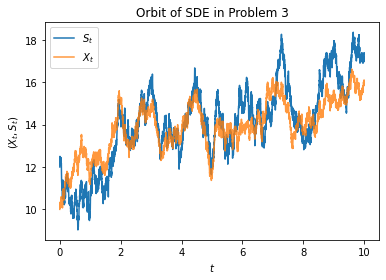

In [8]:
# 实验
x0 = 10
s0 = 12
T, m, n = 10.0, 10000, 1
alpha, mu, sigma = 2.0, 14.0, 2.0
theta, sigma_1, sigma_2 = 2.0, 2.0, 2.0
su = 0
su2 = 0
X, S = SDE_hd(T, m, n)

# 时间格点
t_grid = np.linspace(0, T, m + 1)


# for i in range(n):
#     su += S[i, m]
#     su2 += S[i, m] * S[i, m]
# avg = su / n
# avg2 = su2 / n
# d = avg2 - avg * avg
# avg, avg2, d

# 展示结果
for i in range(n):    
    plt.plot(t_grid, S[i, :], label='$S_t$')
    
for i in range(n):
    plt.plot(t_grid, X[i, :], alpha = 0.8, label='$X_t$')

plt.xlabel('$t$')
plt.ylabel('$(X_t, S_t)$')
plt.legend()
plt.title('Orbit of SDE in Problem 3')
plt.show()
